# Introdução

Este primeiro projeto é uma introdução ao pandas, a ferramenta de gerenciamento de dados mais popular em Python.

O Pandas é a ferramenta que trata de Análise/Ciência de Dados em Python. Nós o usamos para:

+ Carregar/descarregar ler/escrever dados: de e para diferentes formatos (CSV, XML, HTML, Excel, JSON, até mesmo da Internet)
+ Analisar dados: realizar análise estatística, consultar os dados, encontrar inconsistências, etc.
+ Limpeza de dados: encontrar valores ausentes, dados duplicados, valores inválidos ou corrompidos, etc.
+ Visualizações: com o suporte do matplotlib, podemos visualizar rapidamente os dados
+ Manipulação de Dados: um termo não tão científico que envolve o manuseio de dados: mesclar várias fontes de dados, criar representações derivadas, agrupar dados, etc.

Neste projeto, você verá o Pandas em ação.

## 1 Carregando os dados

In [2]:
# importando o pandas
import pandas as pd

Primeiro, começamos importando a biblioteca pandas. Em seguida, carregamos o conjunto de dados de exemplo para este projeto: o índice AMZN da S&P500 de 2017 a 2022.

Carregamos os dados usando o método read_csv. O pandas pode carregar dados de diversos formatos diferentes, e os métodos geralmente têm o formato read_XXX; por exemplo: read_json, read_excel, read_xml, etc.

Agora carregamos os dados contidos no CSV na variável df: um DataFrame. Os DataFrames são a principal estrutura de dados usada pelo Pandas.

Em seguida, damos uma olhada rápida nos dados com os métodos .head() e .tail(). Isso ocorre porque o pandas está preparado para lidar com MILHÕES de linhas (ou até mais). Portanto, geralmente não "imprimimos" todos os dados, apenas damos uma olhada rápida neles.

O método .head() mostra as primeiras 5 linhas, o método .tail() mostra as últimas 5 linhas. Você pode imediatamente ver que o DataFrame se parece muito com uma tabela do Excel. Ele contém um índice, que é a data da leitura.

A fase de análise, é claro, depende da tarefa em mãos e dos dados disponíveis. Isso é apenas um exemplo das capacidades do pandas.

Começamos usando o método .describe(), que fornece estatísticas de resumo rápidas de todo o DataFrame. Temos informações como a média, máximo, etc.

Também podemos obter informações específicas para uma única coluna: df['Close'].min() ou df['Close'].max(). Ah, a propósito, você acabou de ver como fazer uma "seleção de coluna única": df['Close'].head().

In [3]:
# Carregando os dados

df = pd.read_csv("AMZN_data.csv", index_col='date', parse_dates=True)

In [4]:
# head() Mostra as primeiras linhas do DataFrame.
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [5]:
# tail(): Mostra as últimas linhas do DataFrame.
df.tail()

,open,high,low,close,volume,Name
date,,,,,,
2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN
2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN
2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN
2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN
2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN


## 2 Analizando os dados

Resumo rápido das estatísticas do Dataframe:

In [6]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


Estatísticas de apenas uma coluna:

In [7]:
# .min(): Retorna o valor mínimo de uma coluna numérica.
df['close'].min()

248.23

In [8]:
# .max(): Retorna o valor máximo de uma coluna numérica. 
df['close'].max()

1450.89

In [66]:
# Seleção de apenas uma coluna
df['close'].head()

date
2013-02-08    261.95
2013-02-11    257.21
2013-02-12    258.70
2013-02-13    269.47
2013-02-14    269.24
Name: close, dtype: float64

### Visualização: 

Um simples gráfico de linha mostrando o preço de fechamento:

<Axes: title={'center': 'Preço de fechamento Ações Amazon | 2017 - 2022'}, xlabel='date'>

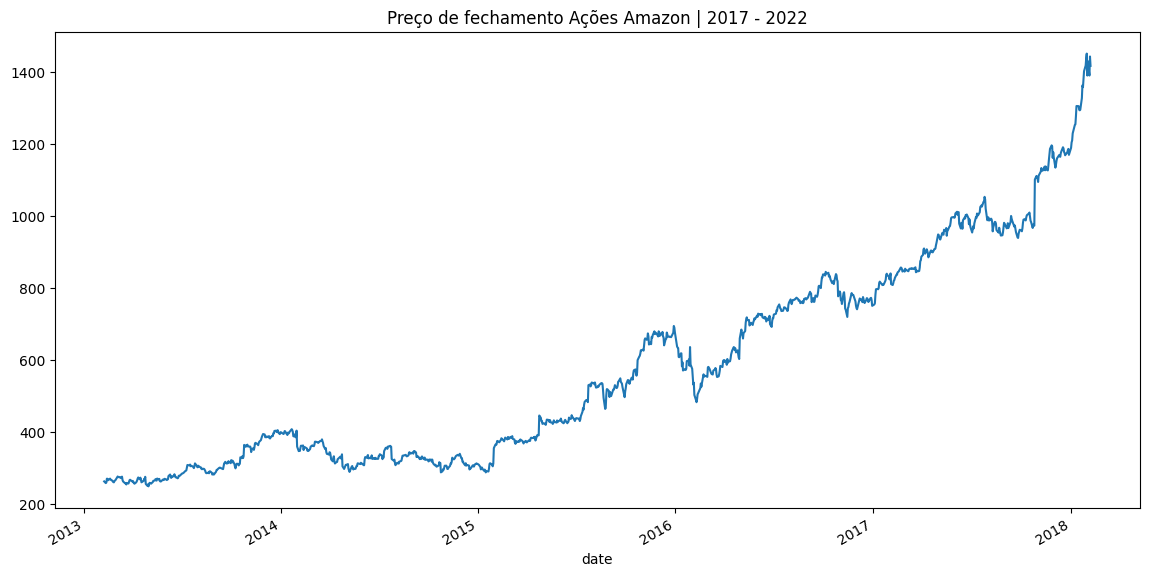

In [9]:
df['close'].plot(figsize=(14, 7), title='Preço de fechamento Ações Amazon | 2017 - 2022')

Um gráfico mais avançado combinando preço de fechamento e volume:

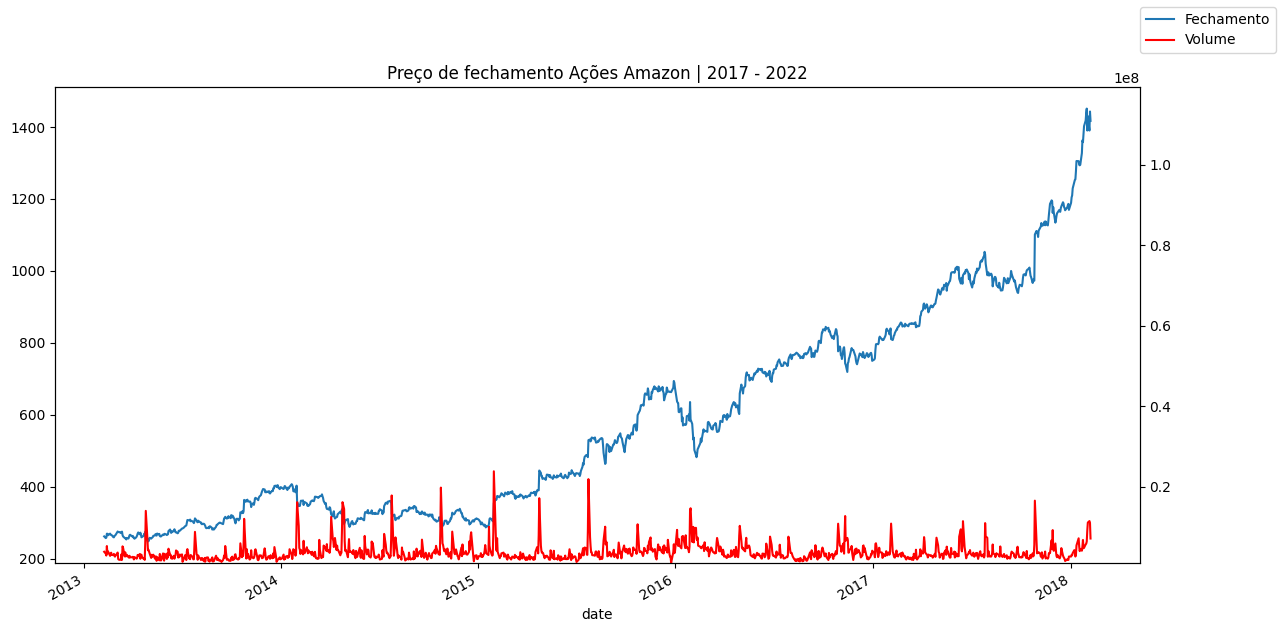

In [10]:
ax1 = df['close'].plot(figsize=(14, 7), title='Preço de fechamento Ações Amazon | 2017 - 2022')

ax2 = ax1.twinx()
df['volume'].plot(ax=ax2, color='red', ylim=[df['volume'].min(), df['volume'].max() * 5])

ax1.figure.legend(["Fechamento", "Volume"])

Algumas visualizações estatísticas.

Um histograma:

<Axes: ylabel='Frequency'>

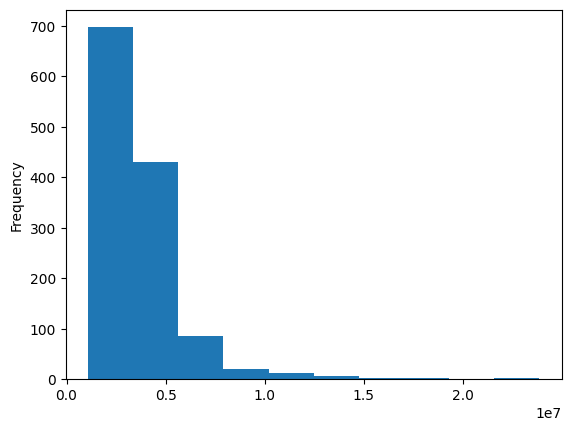

In [11]:
df['volume'].plot(kind='hist')

Um box plot:

<Axes: >

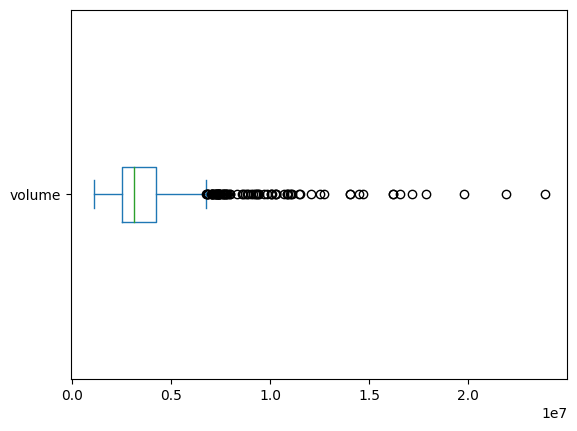

In [12]:
df['volume'].plot(kind='box', vert=False)

## 3 Tratamento de dados

Preço de  `Fechamento` e sua `MMS` (Média Móvel Simples)[SMA]:

In [14]:
df['close SMA'] = df['close'].rolling(60).mean()

In [15]:
df[['close', 'close SMA']].tail(10)

,close,close SMA
date,,
2018-01-25,1377.95,1188.495333
2018-01-26,1402.05,1193.348667
2018-01-29,1417.68,1198.555333
2018-01-30,1437.82,1204.124333
2018-01-31,1450.89,1210.068833
2018-02-01,1390.00,1214.708833
2018-02-02,1429.95,1219.863667
2018-02-05,1390.00,1224.310833
2018-02-06,1442.84,1229.476833


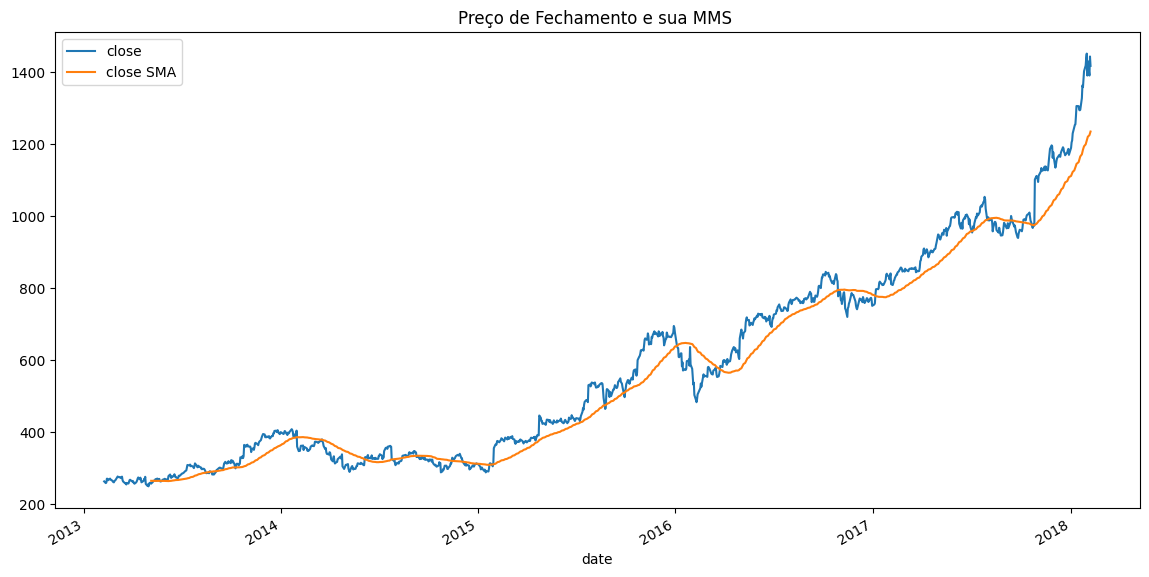

In [16]:
ax = df[['close', 'close SMA']].plot(figsize=(14, 7), title='Preço de Fechamento e sua MMS ')

Calculo das bandas:

    + Banda Inferior = Preço fechamento - 2 * desvio padrão móvel
    + Banda Superior = Preço fechamento + 2 * desvio padrão móvel

In [23]:
df['Lower Band'] = df['close SMA'] - (2 * df['close'].rolling(60).std())
df['Upper Band'] = df['close SMA'] + (2 * df['close'].rolling(60).std())

In [24]:
df[['close', 'close SMA', 'Lower Band', 'Upper Band']].tail()

,close,close SMA,Lower Band,Upper Band
date,,,,
2018-02-01,1390.00,1214.708833,1034.152226,1395.265440
2018-02-02,1429.95,1219.863667,1032.690332,1407.037001
2018-02-05,1390.00,1224.310833,1033.832495,1414.789172
2018-02-06,1442.84,1229.476833,1032.387229,1426.566438
2018-02-07,1416.78,1234.271000,1033.157565,1435.384435


<Axes: title={'center': 'Close Price & its SMA'}, xlabel='date'>

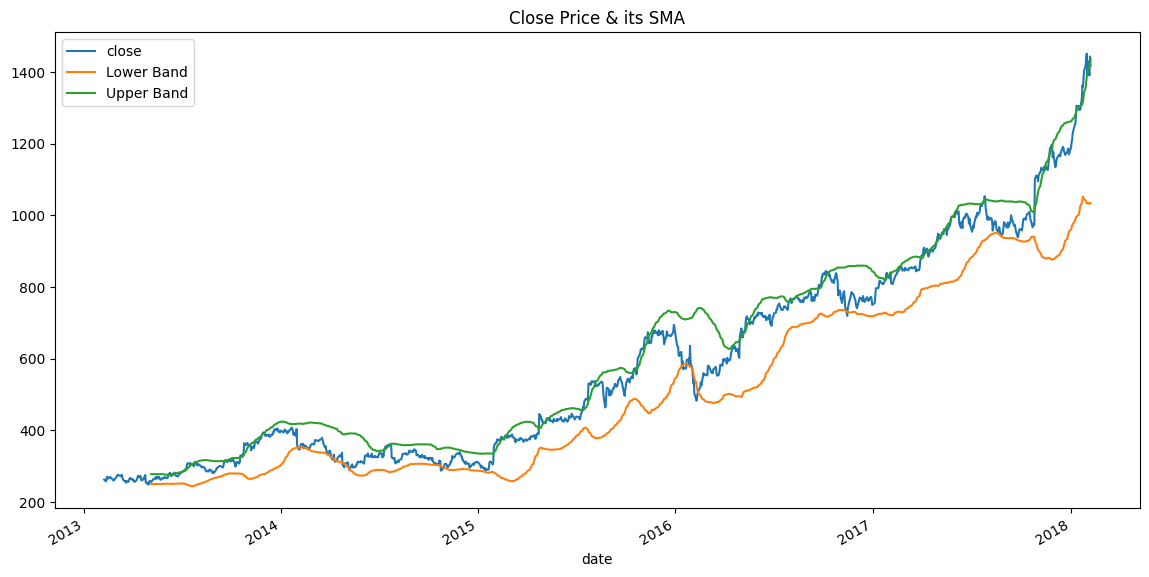

In [25]:
df[['close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA')

Vamos encontrar o ponto mais baixo de preço de fechamento que cruza a banda inferior:

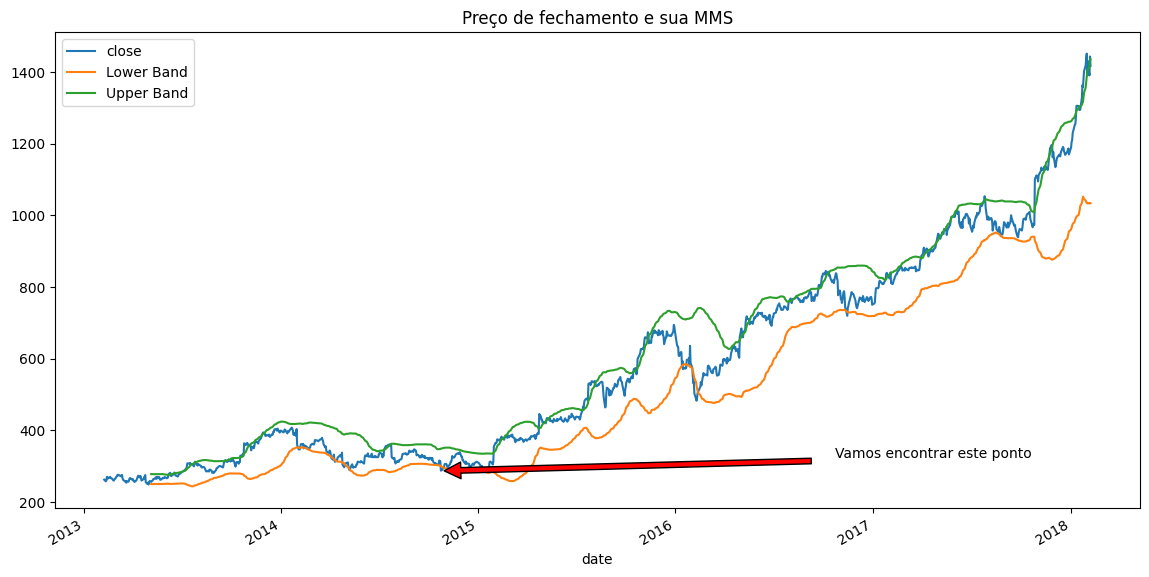

In [32]:
ax = df[['close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Preço de fechamento e sua MMS')
ax.annotate(
    "Vamos encontrar este ponto", xy=(pd.Timestamp("2014-09-22"), 285), 
    xytext=(0.9, 0.1), textcoords='axes fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    horizontalalignment='right', verticalalignment='bottom');

Podemos rapidamente consultar todas as datas que cruzaram a banda inferior (no período de `2014-03-01` a `2014-12-31`)

In [33]:
df.loc['2014-03-01': '2014-12-31'].query("close < `Lower Band`").head()

,open,high,low,close,volume,Name,close SMA,Lower Band,Upper Band
date,,,,,,,,,
2014-04-04,335.15,335.44,315.61,323.00,12534578,AMZN,366.555750,324.902612,408.208888
2014-04-07,320.99,324.94,313.13,317.76,7077360,AMZN,365.168250,322.646524,407.689976
2014-04-10,330.60,331.00,316.50,317.11,6133376,AMZN,361.665000,318.066403,405.263597
2014-04-11,314.00,316.50,309.50,311.73,7292028,AMZN,360.262667,315.736624,404.788710
2014-04-25,316.25,316.49,302.71,303.83,16186737,AMZN,349.378500,309.241620,389.515380


E finalmente podemos dar zoom neste período

<Axes: title={'center': 'Close Price & its SMA | 2020-01-01 to 2020-06-01'}, xlabel='date'>

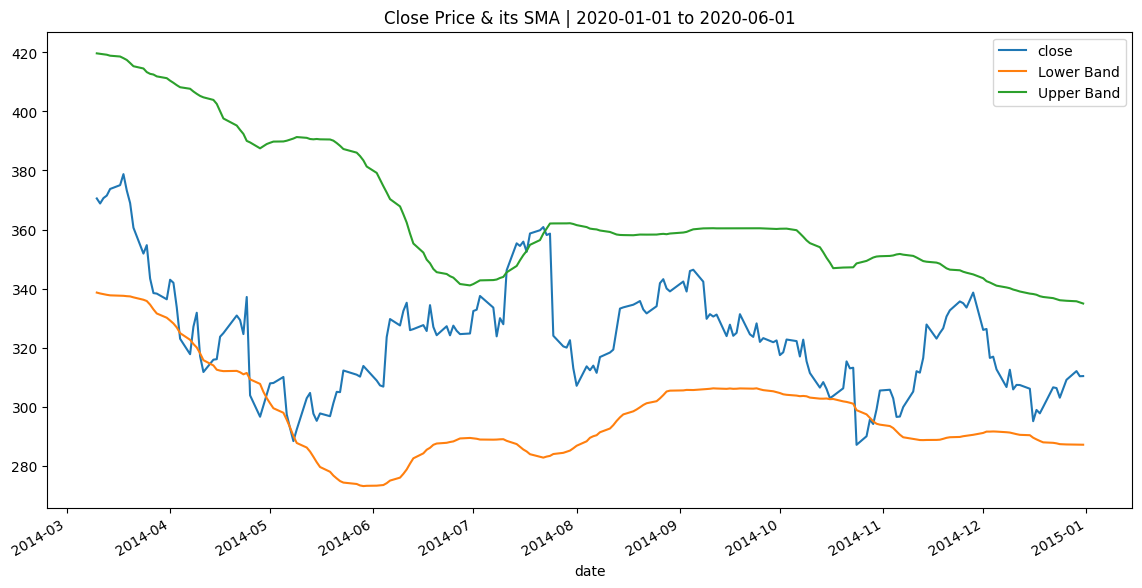

In [35]:
df.loc['2014-03-10': '2014-12-31', ['close', 'Lower Band', 'Upper Band']].plot(figsize=(14, 7), title='Close Price & its SMA | 2020-01-01 to 2020-06-01')